In [1]:
import pickle

df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "rb" ))

In [2]:
# import pandas as pd
# import pickle

# df_flu = pickle.load(open(r"..\data\flu_cases\df_flu.pkl", "rb" ))
# df_flu_COVID = df_flu[df_flu['Week Ending'] >= pd.to_datetime('2020-03-01')]
# df_flu_COVID.head()

In [3]:
# len(df_flu_COVID)

In [4]:
# pickle.dump(df_flu_COVID, open(r"..\data\flu_cases\df_flu_COVID.pkl", "wb" ))

In [5]:
# df_flu_COVID = df_flu_COVID[['Week Ending', 'Total Cases']]
# df_flu_COVID = df_flu_COVID.set_index('Week Ending')
# df_flu_COVID.head()

In [6]:
# pickle.dump(df_flu_COVID, open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "wb" ))

In [7]:
# df_flu = df_flu[['Week Ending', 'Total Cases']]
# df_flu = df_flu.set_index('Week Ending')
# df_flu.head()

In [8]:
# pickle.dump(df_flu, open(r"..\data\flu_cases\df_flu_total.pkl", "wb" ))

In [9]:
# df_flu_pre_COVID = df_flu_pre_COVID[['Week Ending', 'Total Cases']]
# df_flu_pre_COVID = df_flu_pre_COVID.set_index('Week Ending')
# df_flu_pre_COVID.head()

In [10]:
# pickle.dump(df_flu_pre_COVID, open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "wb" ))

# Time Series Analysis

In [11]:
df_flu_pre_COVID.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2015-09-05 to 2020-02-29
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  235 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [12]:
df_flu_COVID.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141 entries, 2020-03-07 to 2022-11-12
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  141 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [13]:
df_flu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 376 entries, 2015-09-05 to 2022-11-12
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  376 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


In [14]:
df_flu = df_flu.reset_index()

In [15]:
df_flu.head()

,Week Ending,Total Cases
0,2015-09-05,9.0
1,2015-09-12,18.0
2,2015-09-19,15.0
3,2015-09-26,29.0
4,2015-10-03,59.0


In [16]:
df_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Week Ending  376 non-null    datetime64[ns]
 1   Total Cases  376 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.0 KB


In [17]:
df_test = df_flu

In [18]:
import pandas as pd
freq = 'D'
df_test['Next Week'] = df_test['Week Ending'] + pd.Timedelta(7, unit=freq)

In [19]:
df_test.set_index('Week Ending', inplace = True)
df_test.head()

,Total Cases,Next Week
Week Ending,,
2015-09-05,9.0,2015-09-12
2015-09-12,18.0,2015-09-19
2015-09-19,15.0,2015-09-26
2015-09-26,29.0,2015-10-03
2015-10-03,59.0,2015-10-10


In [20]:
df_test.loc['2015']

,Total Cases,Next Week
Week Ending,,
2015-09-05,9.0,2015-09-12
2015-09-12,18.0,2015-09-19
2015-09-19,15.0,2015-09-26
2015-09-26,29.0,2015-10-03
2015-10-03,59.0,2015-10-10
2015-10-10,50.0,2015-10-17
2015-10-17,37.0,2015-10-24
2015-10-24,26.0,2015-10-31
2015-10-31,26.0,2015-11-07


In [21]:
df_test.loc['2015-11-01':'2015-12-01']

,Total Cases,Next Week
Week Ending,,
2015-11-07,40.0,2015-11-14
2015-11-14,45.0,2015-11-21
2015-11-21,53.0,2015-11-28
2015-11-28,52.0,2015-12-05


In [22]:
df_test.drop(columns='Next Week', inplace = True)

In [23]:
df_test.to_period('M')

,Total Cases
Week Ending,
2015-09,9.0
2015-09,18.0
2015-09,15.0
2015-09,29.0
2015-10,59.0
...,...
2022-10,259.0
2022-10,468.0
2022-10,1040.0


In [24]:
df_test.head()

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

<AxesSubplot: xlabel='Week Ending'>

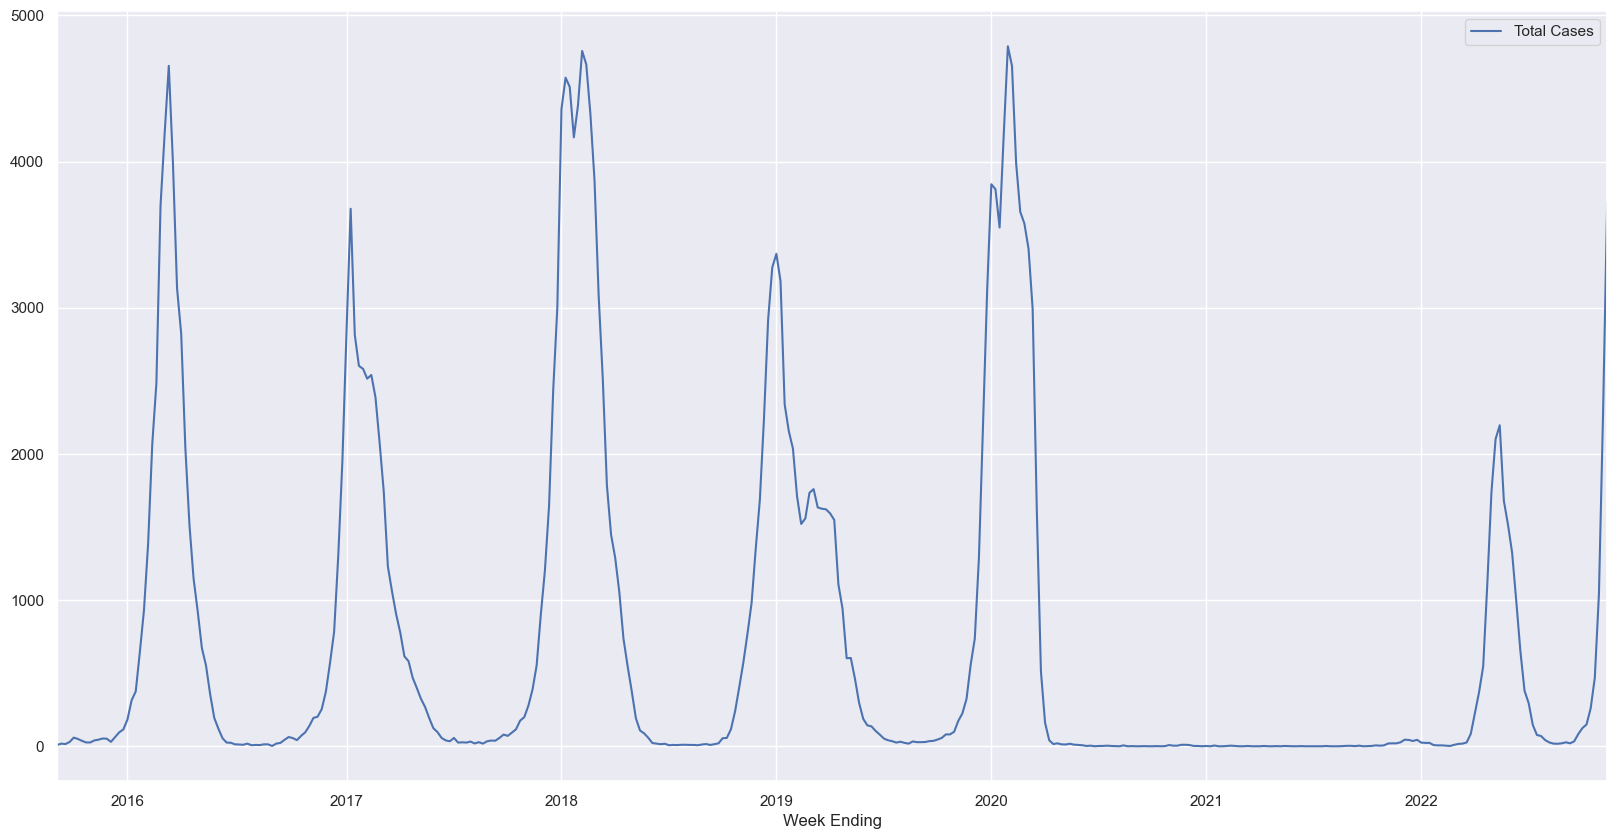

In [26]:
df_flu.plot()

In [27]:
df_flu.head(10)

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0
2015-10-10,50.0
2015-10-17,37.0
2015-10-24,26.0
2015-10-31,26.0


In [28]:
df_flu.asfreq('M', method='bfill') # only returns value at the end of the specified frequency if there's a data point faling on that date
# bfill fills the null values with the value from the next available time point
# ffill fills the null values with the value from the last availabe time point

,Total Cases
Week Ending,
2015-09-30,59.0
2015-10-31,26.0
2015-11-30,30.0
2015-12-31,183.0
2016-01-31,1386.0
...,...
2022-06-30,295.0
2022-07-31,26.0
2022-08-31,27.0


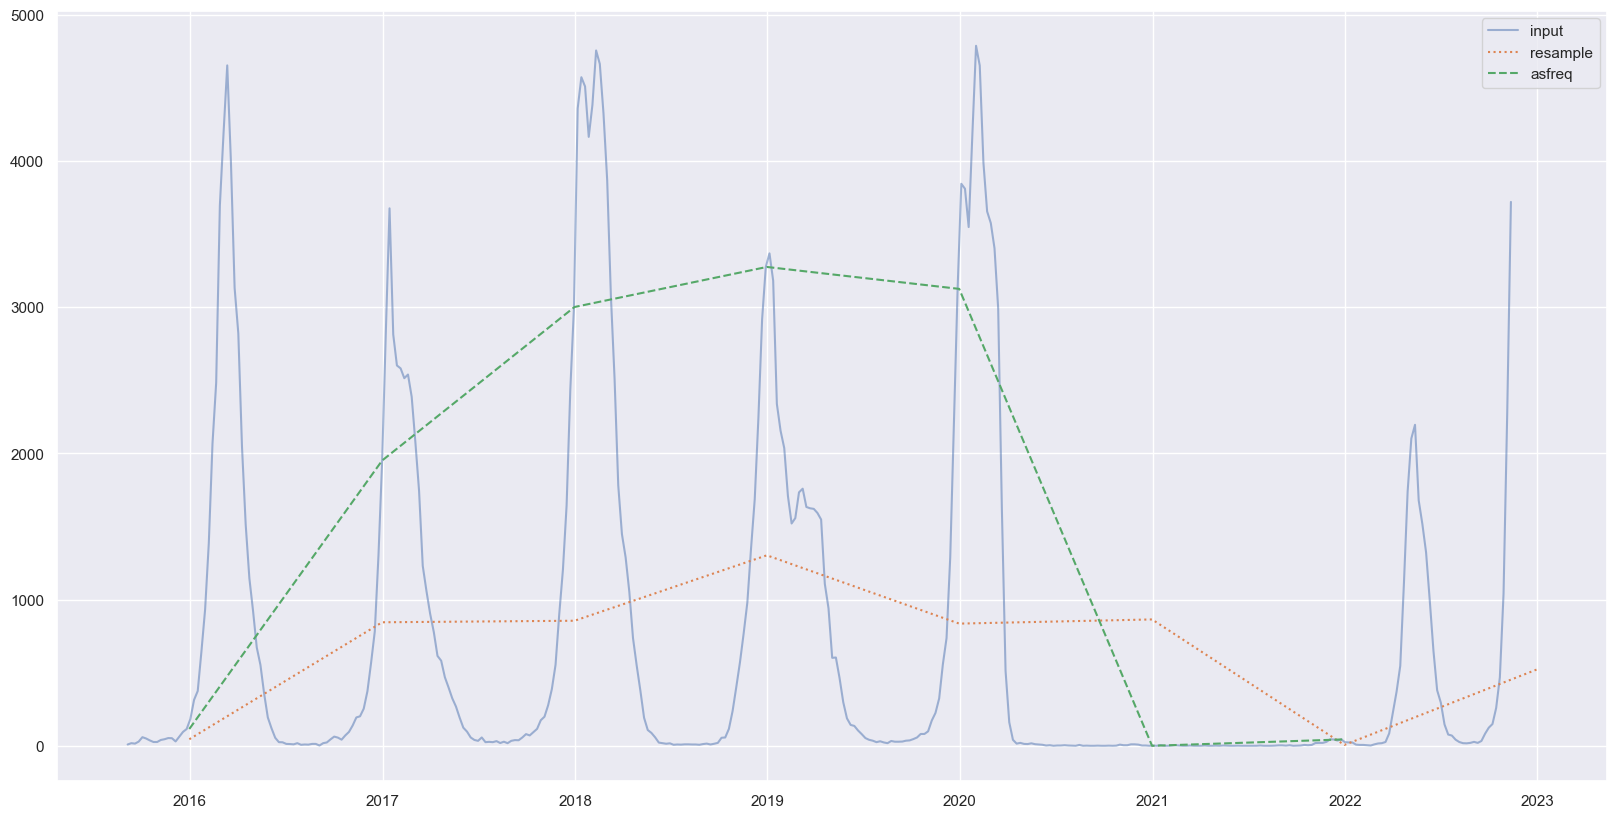

In [29]:
line1 = df_flu
line2 = df_flu.resample('A').mean()
line3 = df_flu.asfreq('A', method='ffill')
line4 = df_flu.asfreq('D', method='bfill')
plt.plot(line1, alpha = 0.5, linestyle = '-', label = 'input')
plt.plot(line2, linestyle = ':', label = 'resample')
plt.plot(line3, linestyle = '--', label = 'asfreq')
# plt.plot(line4, linestyle = '-.', label = 'asfreq_day')
plt.legend()

In [30]:
df_flu.shift(1) # moves data points forward one month

,Total Cases
Week Ending,
2015-09-05,NaN
2015-09-12,9.0
2015-09-19,18.0
2015-09-26,15.0
2015-10-03,29.0
...,...
2022-10-15,149.0
2022-10-22,259.0
2022-10-29,468.0


In [31]:
# df_flu['t+1'] = df_flu.shift(1)
# df_flu.head()

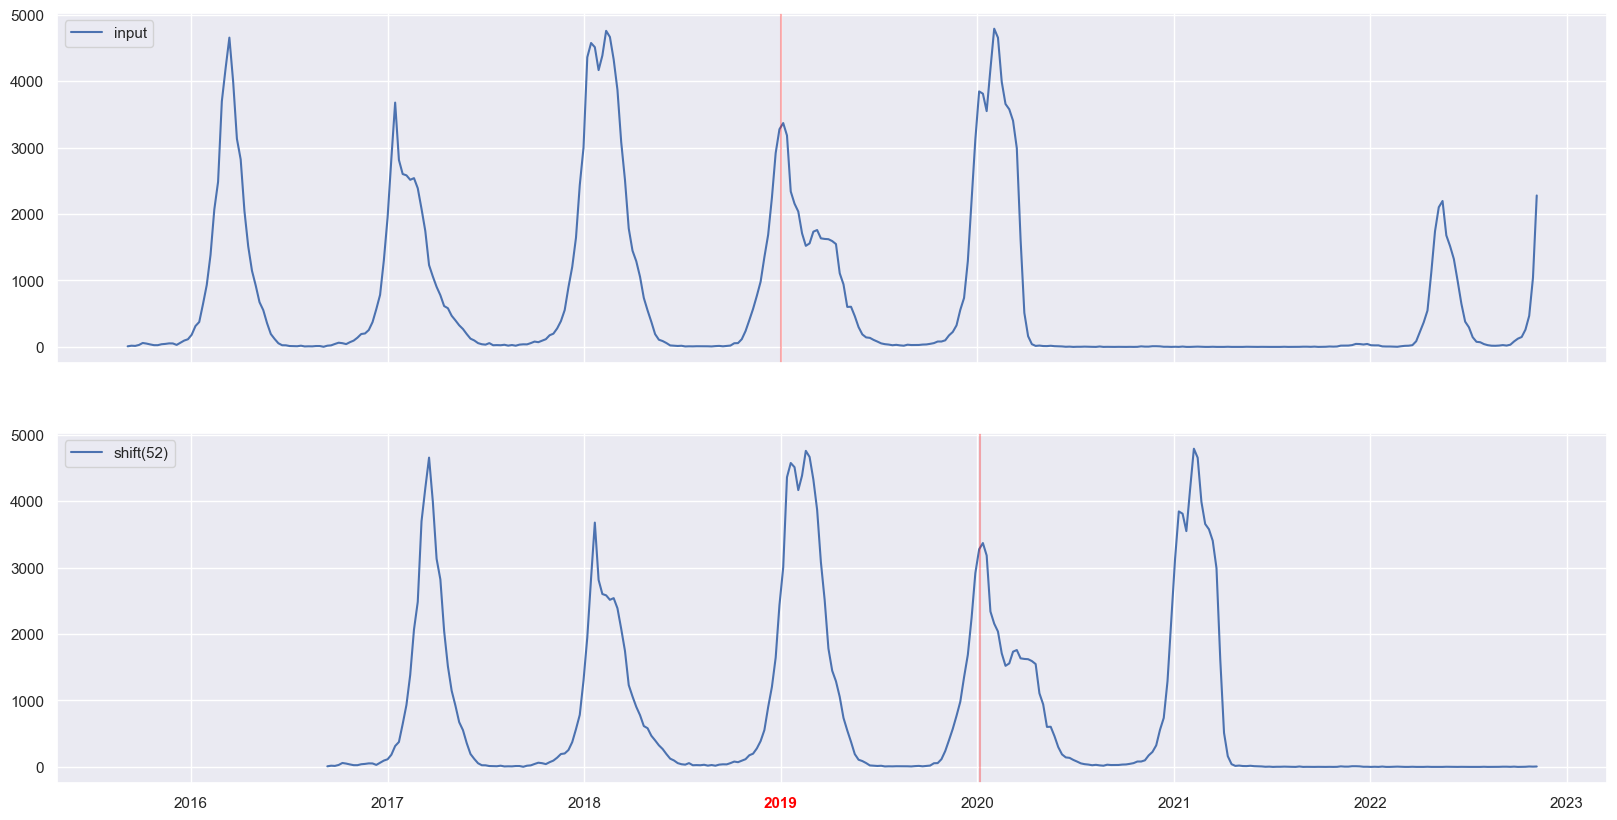

In [32]:
fig, ax = plt.subplots(2, sharex = True)
# apply a frequency to the data
df_flu = df_flu.asfreq('W', method='pad')

line1, = ax[0].plot(df_flu, label = 'input')
line2, = ax[1].plot(df_flu.shift(53), label = 'shift(52)')

#legends and annotations
local_max = pd.to_datetime('2019-01-01')
offset = pd.Timedelta(53, 'W')

ax[0].legend(loc=2)
# ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

In [33]:
df_flu

,Total Cases
Week Ending,
2015-09-06,9.0
2015-09-13,18.0
2015-09-20,15.0
2015-09-27,29.0
2015-10-04,59.0
...,...
2022-10-09,149.0
2022-10-16,259.0
2022-10-23,468.0


In [34]:
df_flu.index

DatetimeIndex(['2015-09-06', '2015-09-13', '2015-09-20', '2015-09-27',
               '2015-10-04', '2015-10-11', '2015-10-18', '2015-10-25',
               '2015-11-01', '2015-11-08',
               ...
               '2022-09-04', '2022-09-11', '2022-09-18', '2022-09-25',
               '2022-10-02', '2022-10-09', '2022-10-16', '2022-10-23',
               '2022-10-30', '2022-11-06'],
              dtype='datetime64[ns]', name='Week Ending', length=375, freq='W-SUN')

In [35]:
df_flu.head()

,Total Cases
Week Ending,
2015-09-06,9.0
2015-09-13,18.0
2015-09-20,15.0
2015-09-27,29.0
2015-10-04,59.0


# Moving Average as a Data Preparation Method

In [36]:
rolling = df_flu['Total Cases'].rolling(2)

In [37]:
df_flu['2-week moving average'] = rolling.mean()
df_flu['2-week moving std'] = rolling.std()
df_flu.head(10)

,Total Cases,2-week moving average,2-week moving std
Week Ending,,,
2015-09-06,9.0,NaN,NaN
2015-09-13,18.0,13.5,6.363961
2015-09-20,15.0,16.5,2.121320
2015-09-27,29.0,22.0,9.899495
2015-10-04,59.0,44.0,21.213203
2015-10-11,50.0,54.5,6.363961
2015-10-18,37.0,43.5,9.192388
2015-10-25,26.0,31.5,7.778175
2015-11-01,26.0,26.0,0.000000


In [38]:
import statistics
statistics.mean([18,15])

16.5

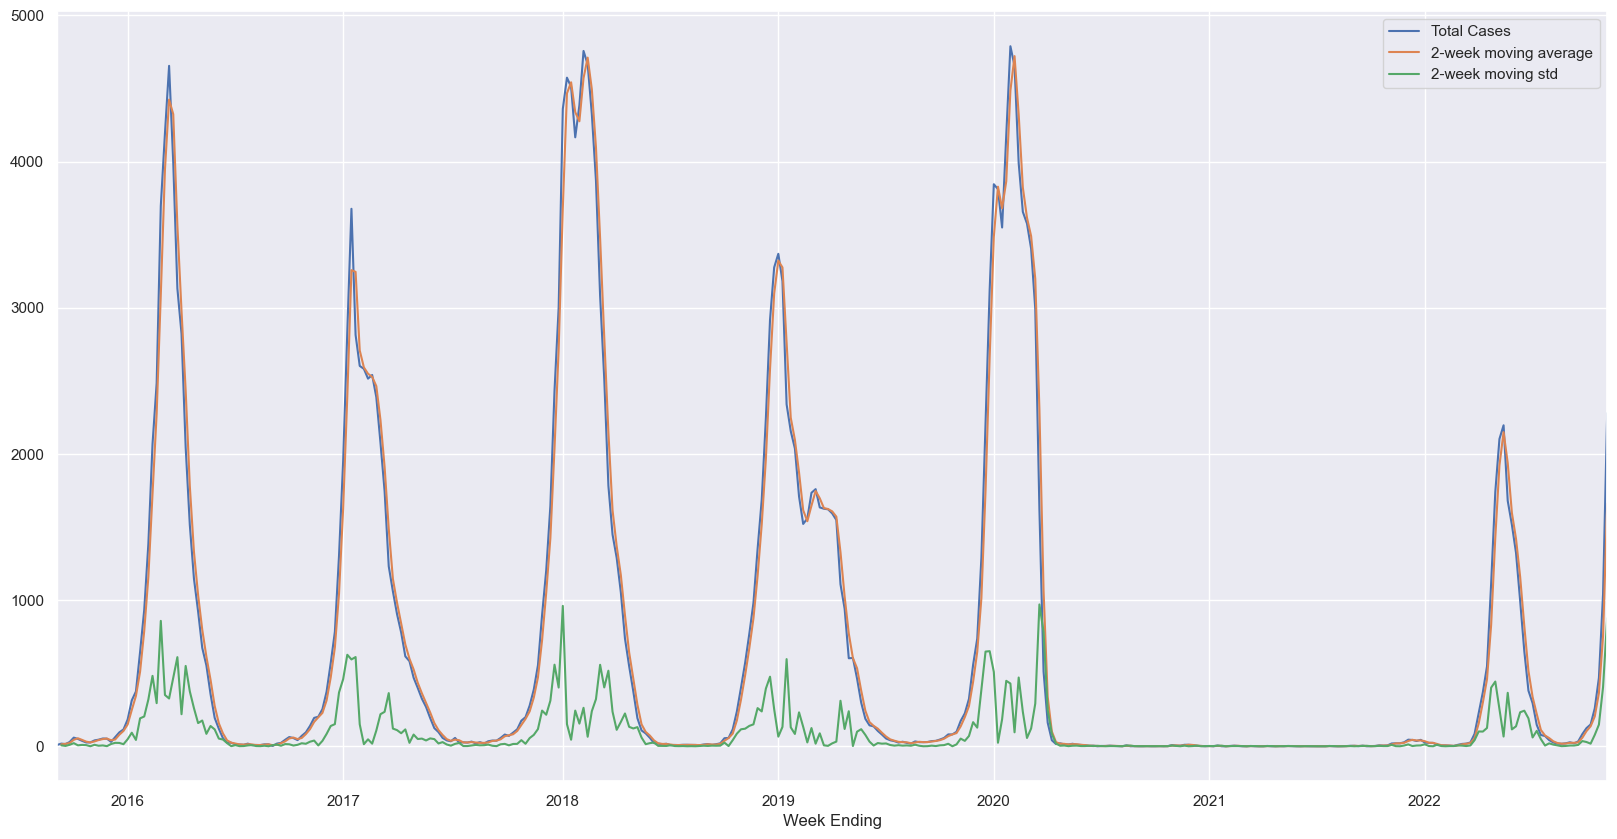

In [39]:
ax = df_flu.plot()

In [40]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

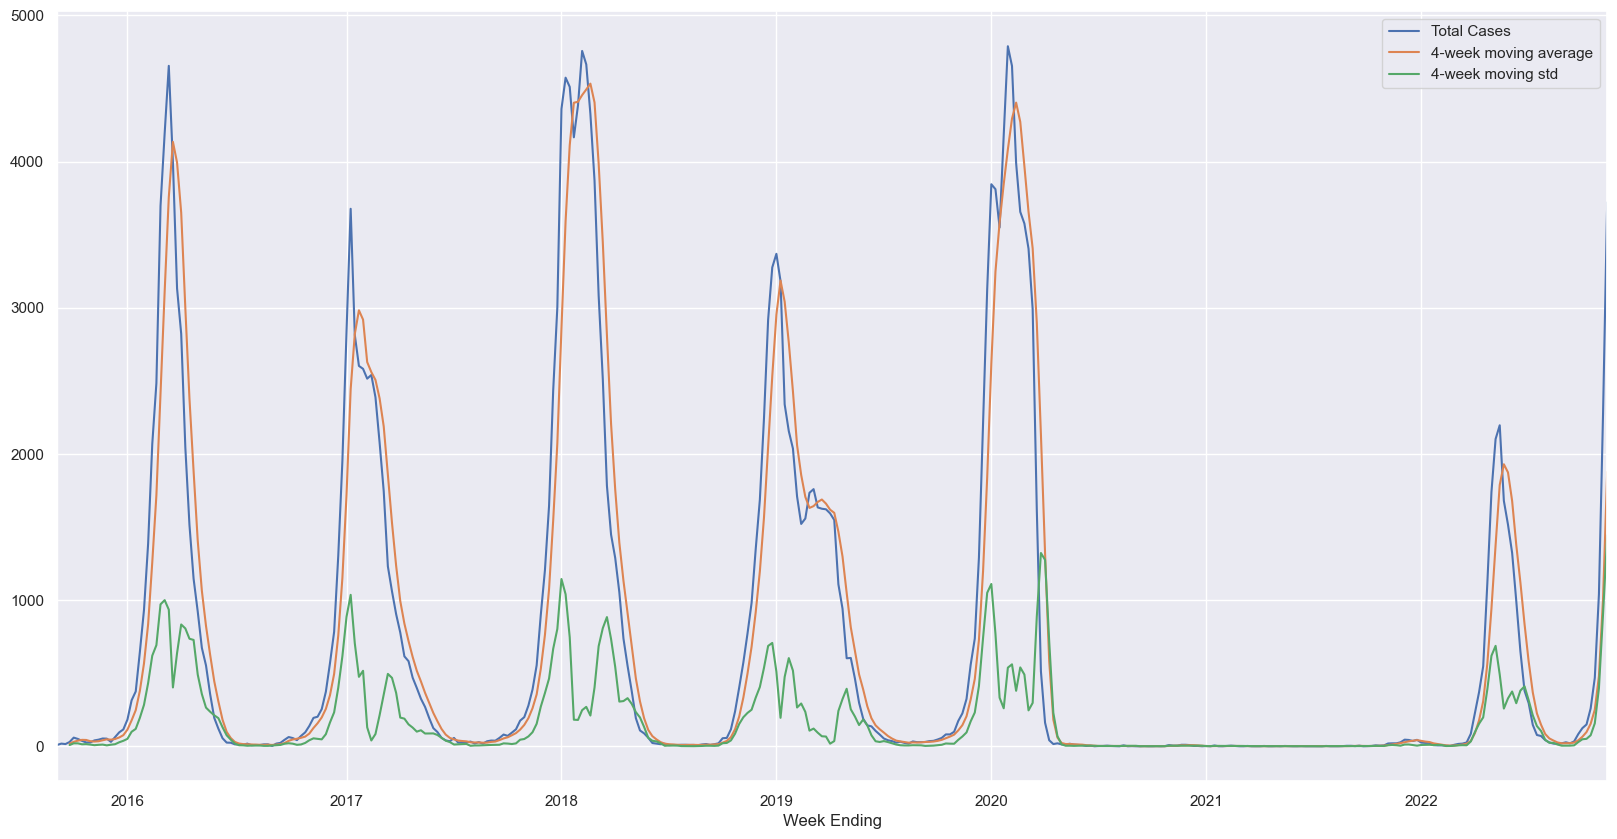

In [41]:
rolling = df_flu['Total Cases'].rolling(4)
df_flu['4-week moving average'] = rolling.mean()
df_flu['4-week moving std'] = rolling.std()
ax = df_flu.plot()

In [42]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

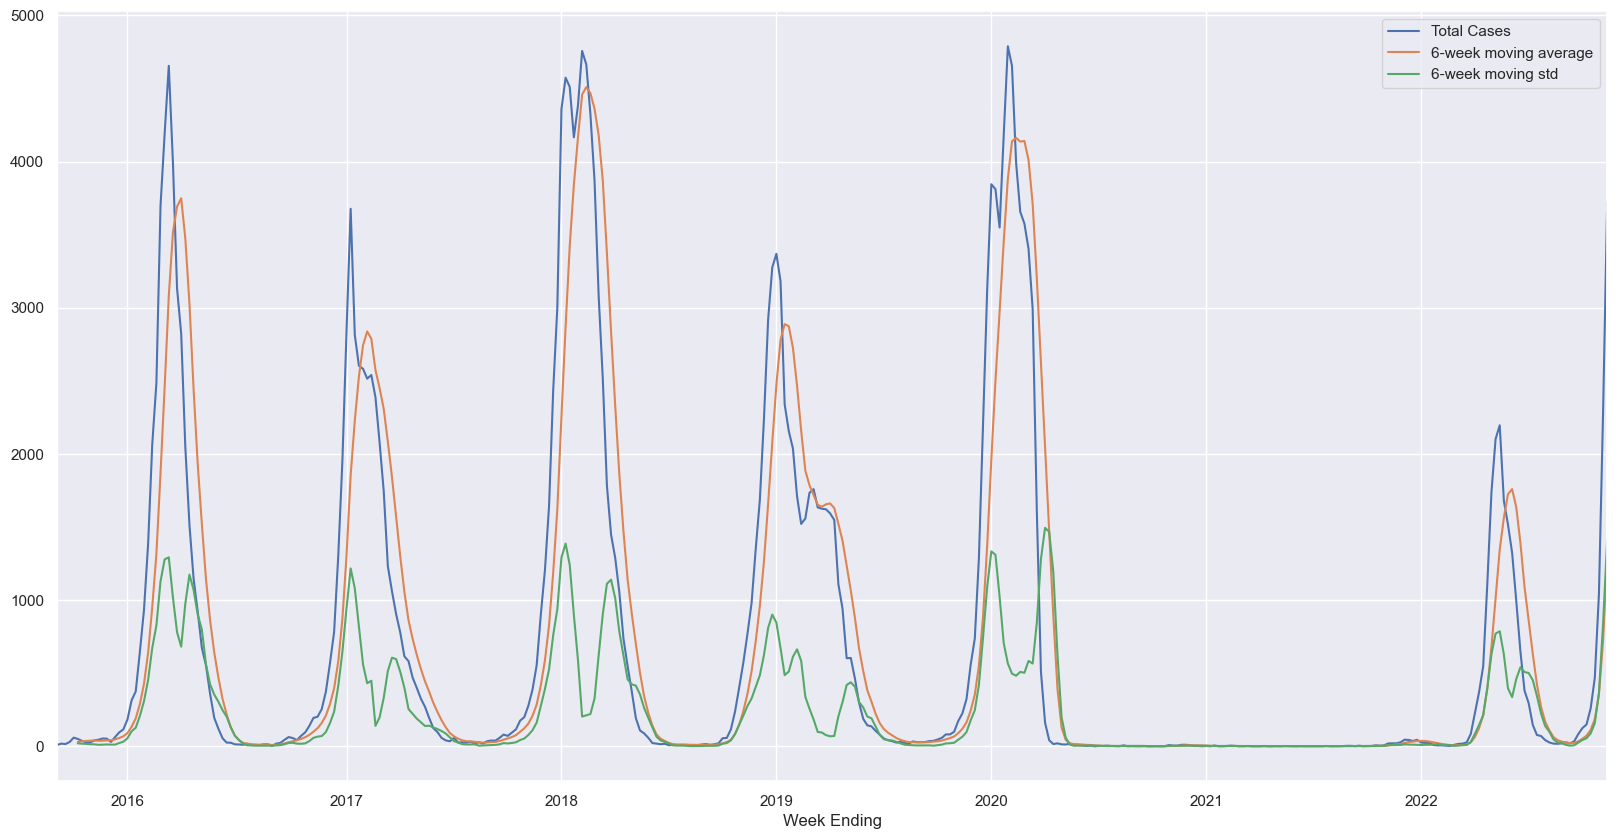

In [43]:
rolling = df_flu['Total Cases'].rolling(6)
df_flu['6-week moving average'] = rolling.mean()
df_flu['6-week moving std'] = rolling.std()
ax = df_flu.plot()

In [44]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

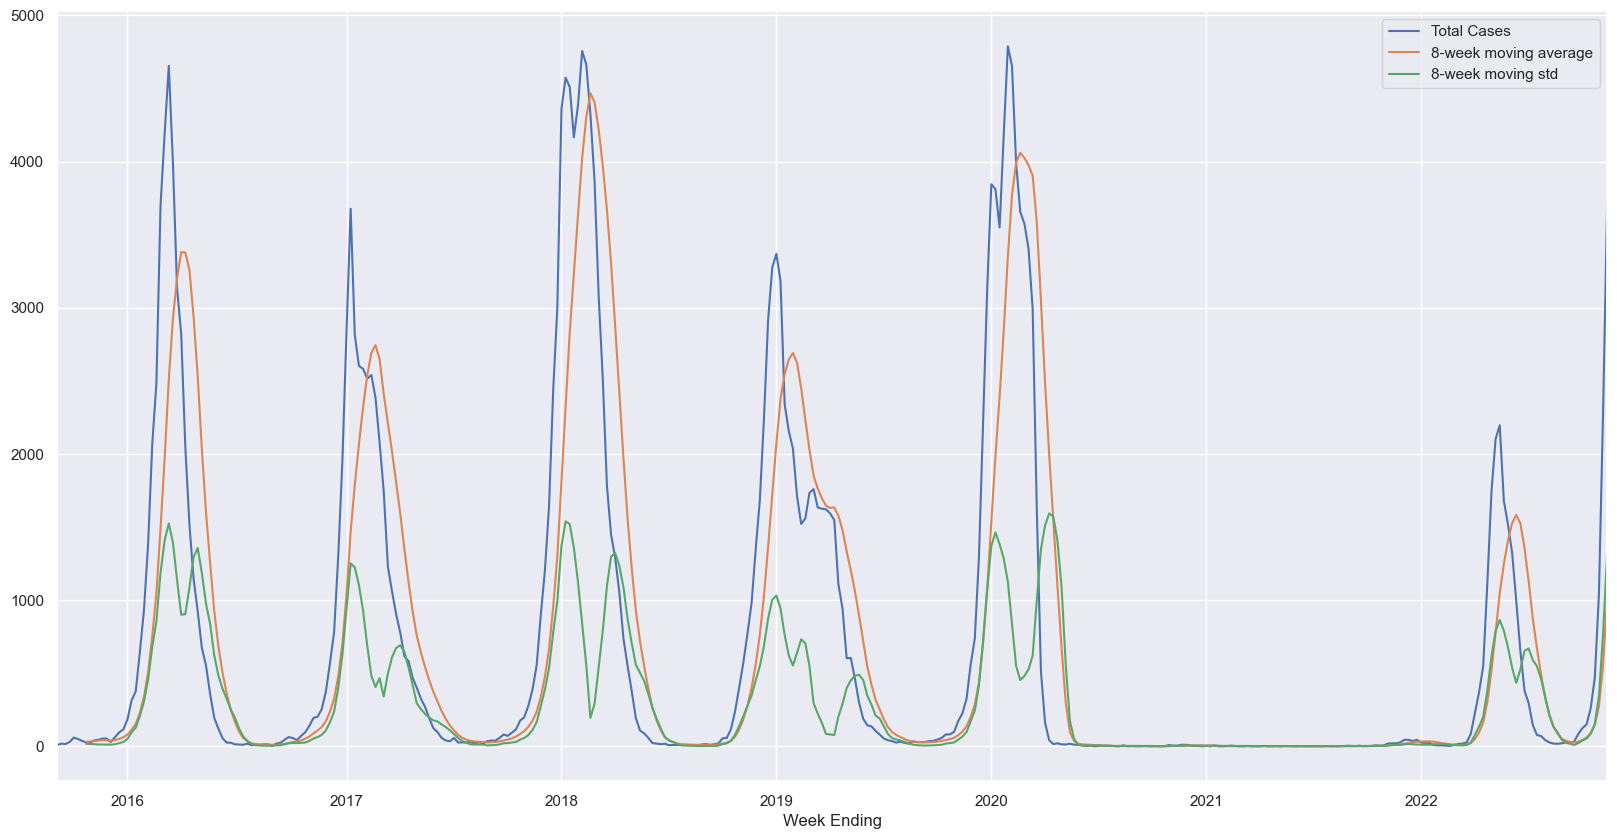

In [45]:
rolling = df_flu['Total Cases'].rolling(8)
df_flu['8-week moving average'] = rolling.mean()
df_flu['8-week moving std'] = rolling.std()
ax = df_flu.plot()

In [46]:
df_flu.head(20)

,Total Cases,8-week moving average,8-week moving std
Week Ending,,,
2015-09-05,9.0,NaN,NaN
2015-09-12,18.0,NaN,NaN
2015-09-19,15.0,NaN,NaN
2015-09-26,29.0,NaN,NaN
2015-10-03,59.0,NaN,NaN
2015-10-10,50.0,NaN,NaN
2015-10-17,37.0,NaN,NaN
2015-10-24,26.0,30.375,17.385852
2015-10-31,26.0,32.500,15.315725


In [56]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

# Moving Average as Feature Engineering

In [57]:
width = 2
lag1 = df_flu.shift(1)
lag2 = df_flu.shift(width-1)
window = lag2.rolling(window=width)
moving_average = window.mean()
df_flu['2-week Moving Average'] = moving_average
df_flu['t - 1'] = lag1
df_flu.head()

,Total Cases,Moving Average,t - 1
Week Ending,,,
2015-09-05,9.0,NaN,NaN
2015-09-12,18.0,NaN,9.0
2015-09-19,15.0,13.5,18.0
2015-09-26,29.0,16.5,15.0
2015-10-03,59.0,22.0,29.0


# Moving Average as Prediction - 1 week into future

In [58]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

predicted=13.5, actual=15.0
predicted=16.5, actual=29.0
predicted=22.0, actual=59.0
predicted=44.0, actual=50.0
predicted=54.5, actual=37.0
predicted=43.5, actual=26.0
predicted=31.5, actual=26.0
predicted=26.0, actual=40.0
predicted=33.0, actual=45.0
predicted=42.5, actual=53.0
predicted=49.0, actual=52.0
predicted=52.5, actual=30.0
predicted=41.0, actual=63.0
predicted=46.5, actual=95.0
predicted=79.0, actual=115.0
predicted=105.0, actual=183.0
predicted=149.0, actual=314.0
predicted=248.5, actual=375.0
predicted=344.5, actual=645.0
predicted=510.0, actual=933.0
predicted=789.0, actual=1386.0
predicted=1159.5, actual=2067.0
predicted=1726.5, actual=2484.0
predicted=2275.5, actual=3697.0
predicted=3090.5, actual=4193.0
predicted=3945.0, actual=4655.0
predicted=4424.0, actual=3994.0
predicted=4324.5, actual=3132.0
predicted=3563.0, actual=2822.0
predicted=2977.0, actual=2045.0
predicted=2433.5, actual=1514.0
predicted=1779.5, actual=1146.0
predicted=1330.0, actual=922.0
predicted=1034.

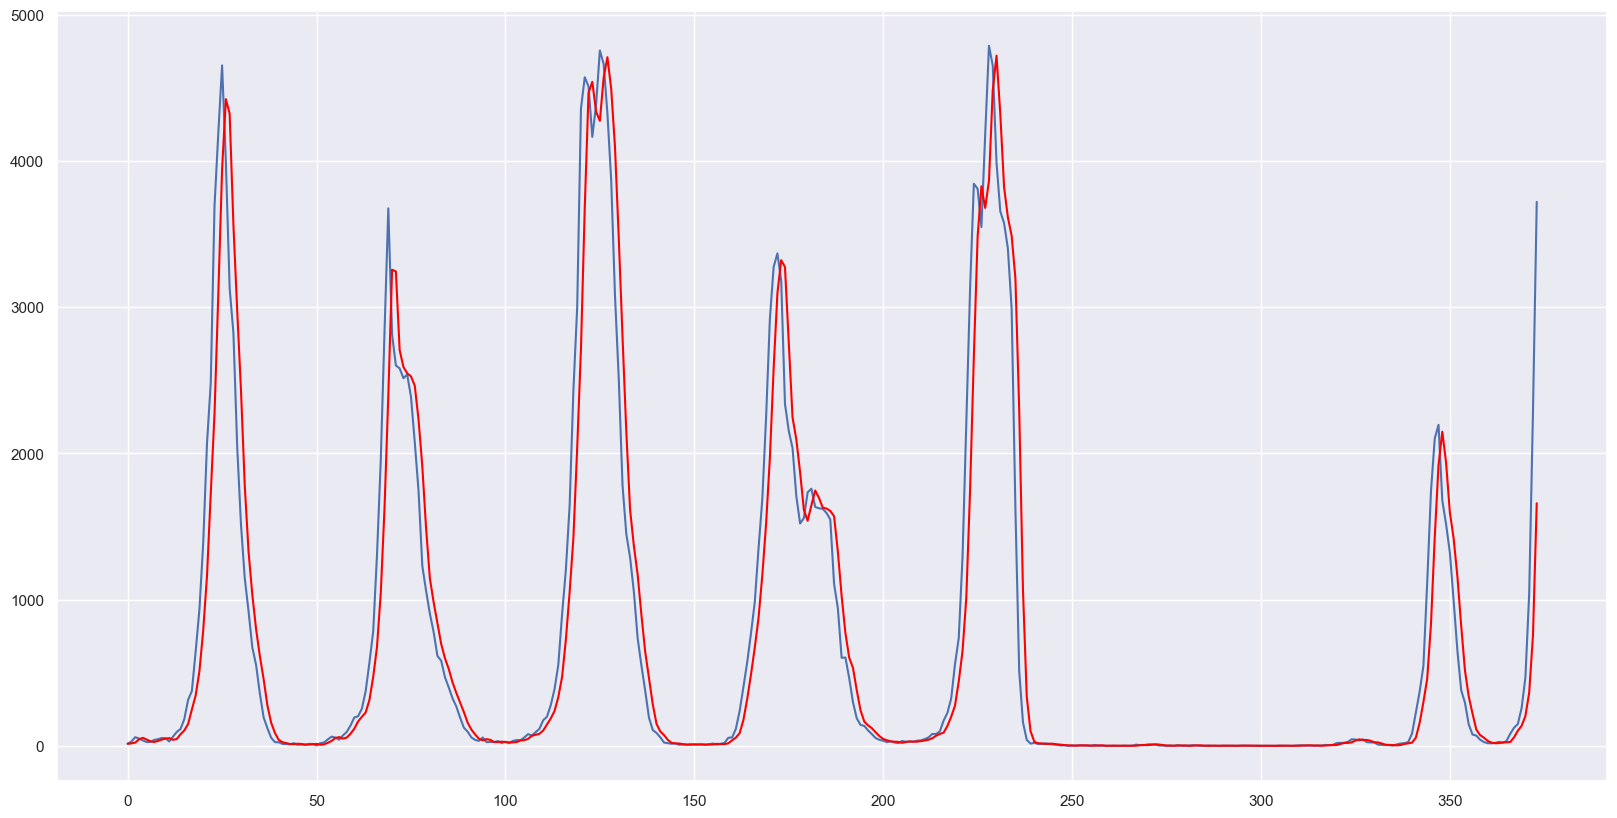

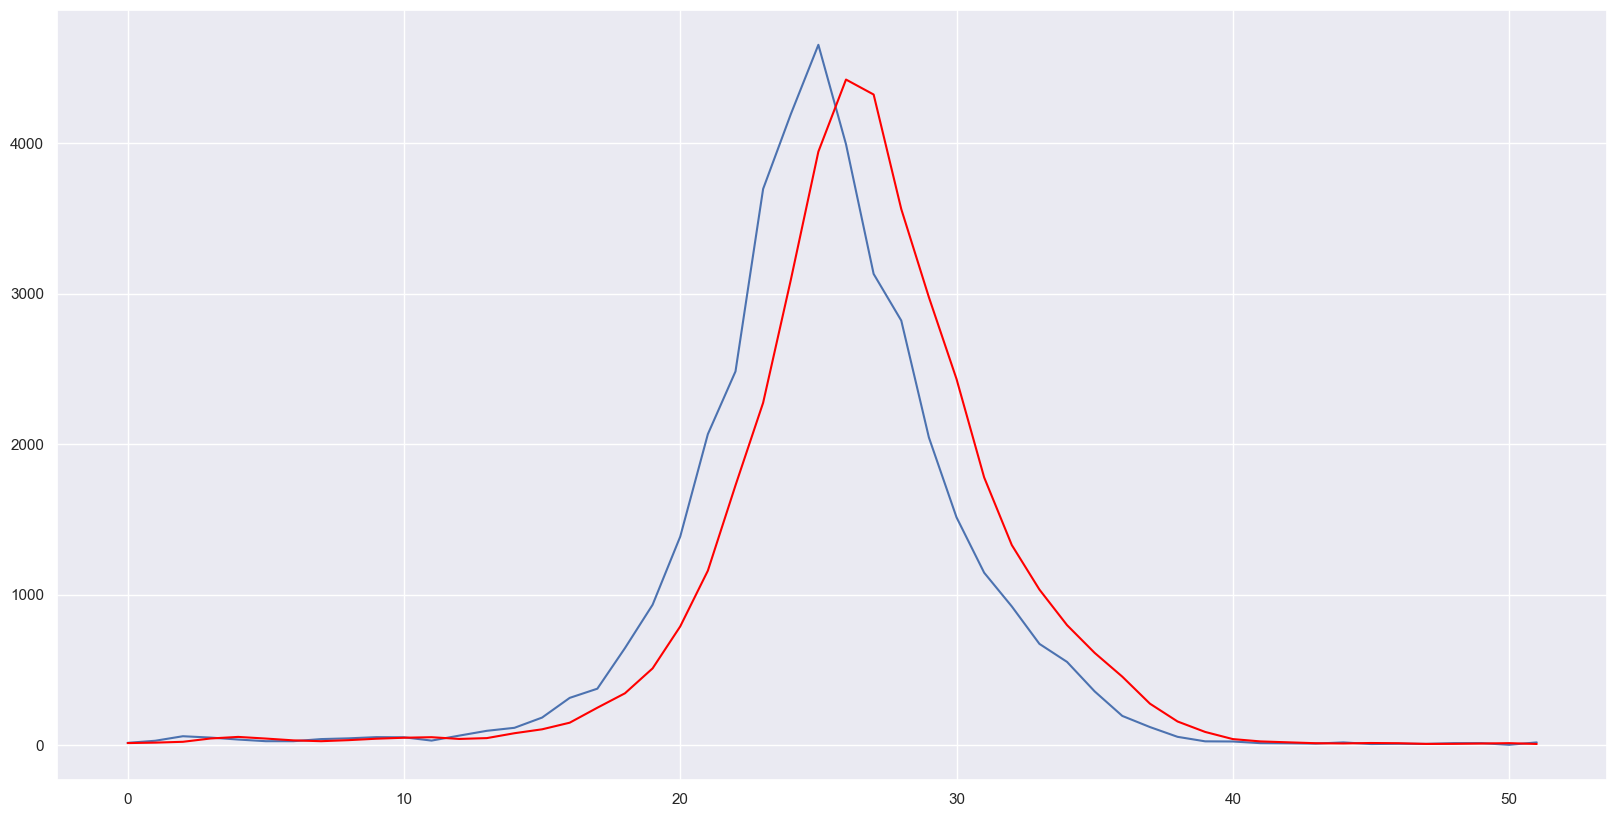

In [75]:
from numpy import mean
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df_flu['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat}, actual={obs}')

# evaluate
MSE = round(mean_squared_error(test, predictions),3)
RMSE = round(mean_squared_error(test, predictions, squared=False),3)
MAE = round(mean_absolute_error(test, predictions),3)

print(f'Test MSE: {MSE}')   # weights large errors more than smaller ones, good for penalizing big mistakes, loses unit because squared
print(f'Test RMSE: {RMSE}')  # more interpretable than MSE because avoids losing units. Also sensitive to outliers
print(f'Test MAE: {MAE}')   # doesn't penalize outliers as much

# can't use MAPE (mean absolute percentage error, because there are zero values in the dataset)


# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:52])
plt.plot(predictions[0:52], color='red')
plt.show()

In [76]:
import numpy as np

# Moving Average as Prediction - 4 weeks into future

In [3]:
import pickle
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

In [4]:
df_flu = df_flu.resample('M').mean()

<AxesSubplot: xlabel='Week Ending'>

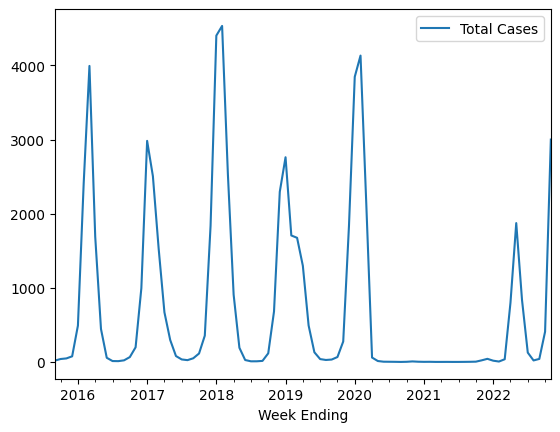

In [6]:
df_flu.plot()

predicted=28.675, actual=47.5
predicted=43.55, actual=75.75
predicted=61.625, actual=490.0
predicted=282.875, actual=2408.5
predicted=1449.25, actual=3993.5
predicted=3201.0, actual=1689.8
predicted=2841.65, actual=444.25
predicted=1067.025, actual=56.0
predicted=250.125, actual=12.0
predicted=34.0, actual=10.75
predicted=11.375, actual=21.75
predicted=16.25, actual=65.4
predicted=43.575, actual=197.25
predicted=131.325, actual=996.0
predicted=596.625, actual=2982.5
predicted=1989.25, actual=2506.25
predicted=2744.375, actual=1528.5
predicted=2017.375, actual=669.6
predicted=1099.05, actual=296.5
predicted=483.05, actual=79.5
predicted=188.0, actual=33.6
predicted=56.55, actual=24.25
predicted=28.925, actual=49.6
predicted=36.925, actual=113.75
predicted=81.675, actual=354.75
predicted=234.25, actual=1836.8
predicted=1095.775, actual=4402.75
predicted=3119.775, actual=4533.25
predicted=4468.0, actual=2539.0
predicted=3536.125, actual=907.25
predicted=1723.125, actual=191.25
predicted=5

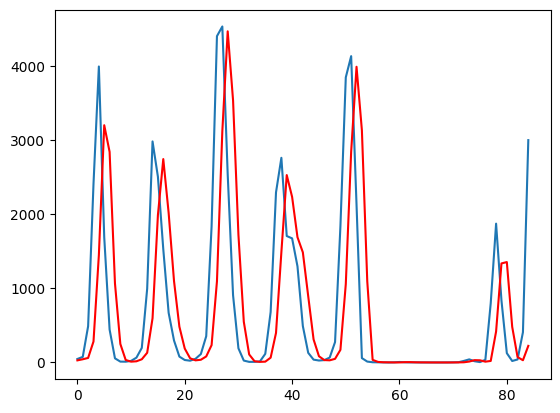

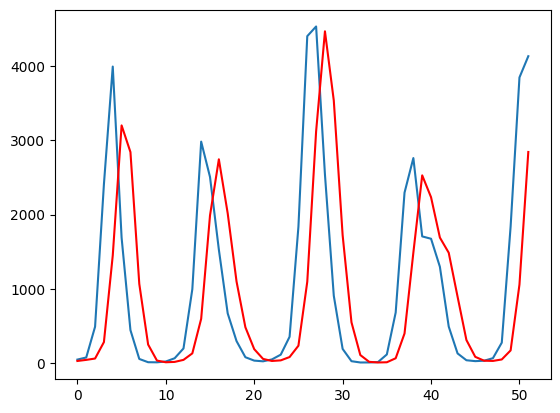

In [8]:
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df_flu['Total Cases']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat}, actual={obs}')

# evaluate
MSE = round(mean_squared_error(test, predictions),3)
RMSE = round(mean_squared_error(test, predictions, squared=False),3)
MAE = round(mean_absolute_error(test, predictions),3)

print(f'Test MSE: {MSE}')   # weights large errors more than smaller ones, good for penalizing big mistakes, loses unit because squared
print(f'Test RMSE: {RMSE}')  # more interpretable than MSE because avoids losing units. Also sensitive to outliers
print(f'Test MAE: {MAE}')   # doesn't penalize outliers as much

# can't use MAPE (mean absolute percentage error, because there are zero values in the dataset)


# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:52])
plt.plot(predictions[0:52], color='red')
plt.show()

In [ ]:
import numpy as np

## Train Test Split

In [78]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

In [89]:
df_flu.head()

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0


In [91]:
type(df_flu['Total Cases'])

pandas.core.series.Series

In [101]:
# train / test split

X = df_flu['Total Cases']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

print('train_length:', len(train), '\ntest_lenth:', len(test) )

# forecast horizon
h = len(test)


train_length: 248 
test_lenth: 128


# Seasonal Naive Forecast - Post-COVID
Uses the observations from the corresponding season from last period

In [94]:
def pysnaive(train_series,seasonal_periods,forecast_horizon):
    '''
    Python implementation of Seasonal Naive Forecast. 
    This should work similar to https://otexts.com/fpp2/simple-methods.html
    Returns two arrays
     > fitted: Values fitted to the training dataset
     > fcast: seasonal naive forecast
    
    Author: Sandeep Pawar
    
    Date: Apr 9, 2020
    
    Ver: 1.0
    
    train_series: Pandas Series
        Training Series to be used for forecasting. This should be a valid Pandas Series. 
        Length of the Training set should be greater than or equal to number of seasonal periods
        
    Seasonal_periods: int
        No of seasonal periods
        Yearly=1
        Quarterly=4
        Monthly=12
        Weekly=52
        

    Forecast_horizon: int
        Number of values to forecast into the future
    
    e.g. 
    fitted_values = pysnaive(train,12,12)[0]
    fcast_values = pysnaive(train,12,12)[1]
    '''
    
    if len(train_series)>= seasonal_periods: #checking if there are enough observations in the training data
        
        last_season=train_series.iloc[-seasonal_periods:]
        
        reps=int(np.ceil(forecast_horizon/seasonal_periods))
        
        fcarray=np.tile(last_season,reps)
        
        fcast=pd.Series(fcarray[:forecast_horizon])
        
        fitted = train_series.shift(seasonal_periods)
        
    else:
        fcast=print("Length of the trainining set must be greater than number of seasonal periods") 
    
    return fitted, fcast

In [98]:
predictions = pd.DataFrame(test).copy()

In [99]:
predictions

,Total Cases
Week Ending,
2020-06-06,7.0
2020-06-13,2.0
2020-06-20,4.0
2020-06-27,0.0
2020-07-04,2.0
...,...
2022-10-15,259.0
2022-10-22,468.0
2022-10-29,1040.0


In [106]:
# fitted values

py_snaive_fit = pysnaive(train,
                            seasonal_periods=52,
                            forecast_horizon=h)[0]

# forecast

py_snaive = pysnaive(train,
                        seasonal_periods=52,
                        forecast_horizon=h)[1]

# residuals

py_snaive_resid = (train - py_snaive_fit).dropna()


# predictions

predictions['py_snaive'] = py_snaive.values

predictions

,Total Cases,py_snaive
Week Ending,,
2020-06-06,7.0,143.0
2020-06-13,2.0,136.0
2020-06-20,4.0,105.0
2020-06-27,0.0,80.0
2020-07-04,2.0,53.0
...,...,...
2022-10-15,259.0,81.0
2022-10-22,468.0,81.0
2022-10-29,1040.0,99.0


In [107]:
import pandas as pd
import numpy as np
import itertools

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use('seaborn-white')
pd.plotting.register_matplotlib_converters()
%matplotlib inline

C:\Users\User\AppData\Local\Temp\ipykernel_30656\1466640590.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


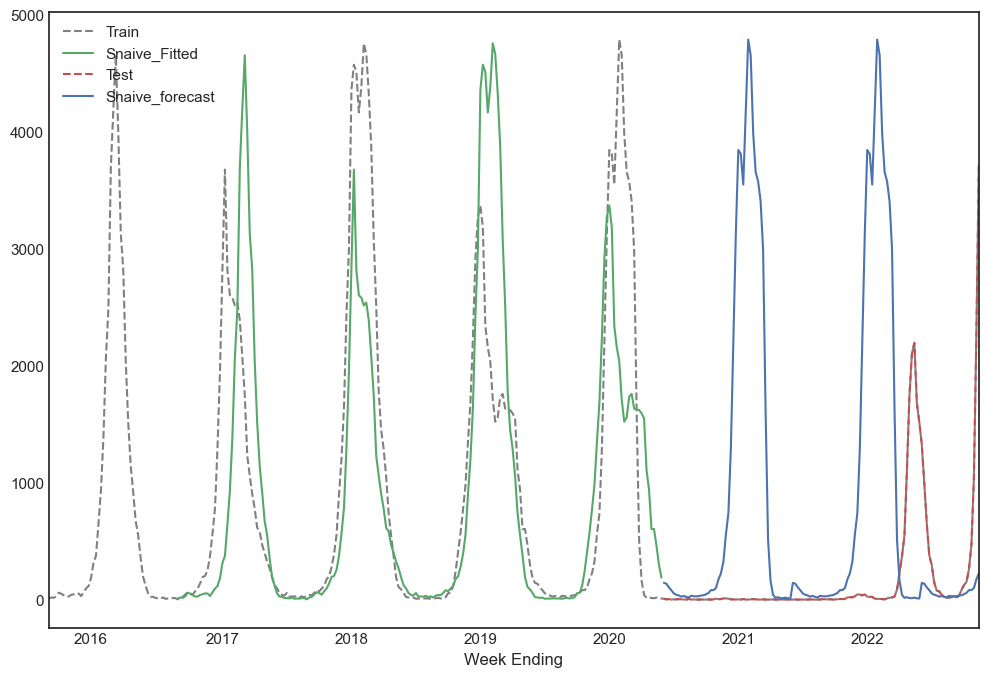

In [110]:
pd.plotting.register_matplotlib_converters()
df_flu['Total Cases'].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
py_snaive_fit.plot(color='g', legend=True, label="Snaive_Fitted")
predictions['Total Cases'].plot(linestyle='--', color='r', legend=True, label="Test")
predictions['py_snaive'].plot(color='b', legend=True, label='Snaive_forecast');

In [ ]:
# training score:

MSE = round(mean_squared_error(train, predictions),3)
RMSE = round(mean_squared_error(train, predictions, squared=False),3)
MAE = round(mean_absolute_error(train, predictions),3)

print(f'train MSE: {MSE}')   # weights large errors more than smaller ones, good for penalizing big mistakes, loses unit because squared
print(f'train RMSE: {RMSE}')  # more interpretable than MSE because avoids losing units. Also sensitive to outliers
print(f'train MAE: {MAE}')   # doesn't penalize outliers as much

In [111]:
# test score:

MSE = round(mean_squared_error(predictions['Total Cases'], predictions['py_snaive']),3)
RMSE = round(mean_squared_error(predictions['Total Cases'], predictions['py_snaive'], squared=False),3)
MAE = round(mean_absolute_error(predictions['Total Cases'], predictions['py_snaive']),3)

print(f'Test MSE: {MSE}')   # weights large errors more than smaller ones, good for penalizing big mistakes, loses unit because squared
print(f'Test RMSE: {RMSE}')  # more interpretable than MSE because avoids losing units. Also sensitive to outliers
print(f'Test MAE: {MAE}')   # doesn't penalize outliers as much

Test MSE: 3209929.953
Test RMSE: 1791.628
Test MAE: 1019.188


In [114]:
import pandas as pd
import numpy as np
import itertools

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use('seaborn-white')
pd.plotting.register_matplotlib_converters()
%matplotlib inline

#statistics libraries
import statsmodels.api as sm
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera as jb
from itertools import combinations

import fbprophet as Prophet


#library to use R in Python 
import rpy2
from rpy2.robjects import pandas2ri
pandas2ri.activate()
 


import warnings
warnings.filterwarnings("ignore")
np.random.seed(786)

C:\Users\User\AppData\Local\Temp\ipykernel_30656\11897959.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


ModuleNotFoundError: No module named 'pmdarima'

In [115]:
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot

def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    constant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
    
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
    
    Lags should be min(2*seasonal_period, T/5)
    
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
    
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(ljung(x=residuals, lags=lags)[1])
    norm_p_val =  jb(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
    
    
    
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));

    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    
    print("** Mean of the residuals: ", np.around(resid_mean,2))
    
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
    
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3), "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
    
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    
    
    return ts_ax, acf_ax, kde_ax

In [127]:
round(len(df_flu)/5)

75

In [128]:
seasonal_period = 52
T = len(df_flu)
lags = min(2*seasonal_period, round(T/5))

In [129]:
residcheck(py_snaive_resid,lags=lags);

KeyError: 1

# Seasonal Naive Forecast - Pre-COVID
Uses the observations from the corresponding season from last period

## Train Test Split

In [132]:
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))

In [133]:
df_flu_pre_COVID.head()

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0


In [134]:
# train / test split

X = df_flu_pre_COVID['Total Cases']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

print('train_length:', len(train), '\ntest_lenth:', len(test) )

# forecast horizon
h = len(test)


train_length: 155 
test_lenth: 80


In [135]:
def pysnaive(train_series,seasonal_periods,forecast_horizon):
    '''
    Python implementation of Seasonal Naive Forecast. 
    This should work similar to https://otexts.com/fpp2/simple-methods.html
    Returns two arrays
     > fitted: Values fitted to the training dataset
     > fcast: seasonal naive forecast
    
    Author: Sandeep Pawar
    
    Date: Apr 9, 2020
    
    Ver: 1.0
    
    train_series: Pandas Series
        Training Series to be used for forecasting. This should be a valid Pandas Series. 
        Length of the Training set should be greater than or equal to number of seasonal periods
        
    Seasonal_periods: int
        No of seasonal periods
        Yearly=1
        Quarterly=4
        Monthly=12
        Weekly=52
        

    Forecast_horizon: int
        Number of values to forecast into the future
    
    e.g. 
    fitted_values = pysnaive(train,12,12)[0]
    fcast_values = pysnaive(train,12,12)[1]
    '''
    
    if len(train_series)>= seasonal_periods: #checking if there are enough observations in the training data
        
        last_season=train_series.iloc[-seasonal_periods:]
        
        reps=int(np.ceil(forecast_horizon/seasonal_periods))
        
        fcarray=np.tile(last_season,reps)
        
        fcast=pd.Series(fcarray[:forecast_horizon])
        
        fitted = train_series.shift(seasonal_periods)
        
    else:
        fcast=print("Length of the trainining set must be greater than number of seasonal periods") 
    
    return fitted, fcast

In [136]:
predictions = pd.DataFrame(test).copy()

In [137]:
predictions

,Total Cases
Week Ending,
2018-08-25,7.0
2018-09-01,12.0
2018-09-08,15.0
2018-09-15,9.0
2018-09-22,14.0
...,...
2020-02-01,4789.0
2020-02-08,4654.0
2020-02-15,3989.0


In [138]:
# fitted values

py_snaive_fit = pysnaive(train,
                            seasonal_periods=52,
                            forecast_horizon=h)[0]

# forecast

py_snaive = pysnaive(train,
                        seasonal_periods=52,
                        forecast_horizon=h)[1]

# residuals

py_snaive_resid = (train - py_snaive_fit).dropna()


# predictions

predictions['py_snaive'] = py_snaive.values

predictions

,Total Cases,py_snaive
Week Ending,,
2018-08-25,7.0,18.0
2018-09-01,12.0,34.0
2018-09-08,15.0,39.0
2018-09-15,9.0,38.0
2018-09-22,14.0,57.0
...,...,...
2020-02-01,4789.0,4385.0
2020-02-08,4654.0,4757.0
2020-02-15,3989.0,4665.0


In [139]:
import pandas as pd
import numpy as np
import itertools

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use('seaborn-white')
pd.plotting.register_matplotlib_converters()
%matplotlib inline

C:\Users\User\AppData\Local\Temp\ipykernel_30656\1466640590.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


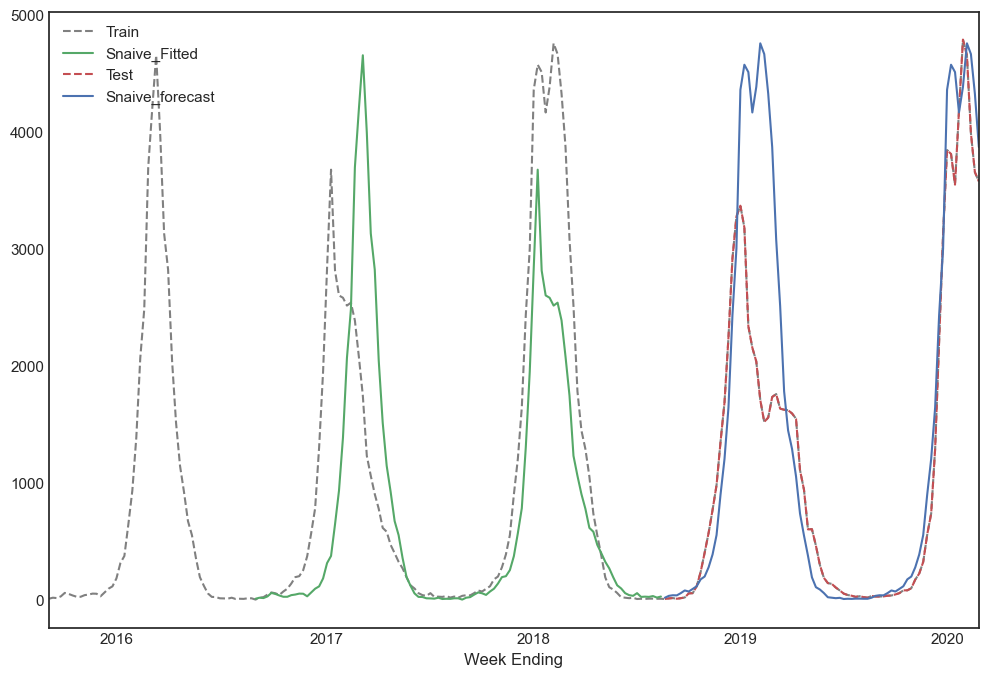

In [141]:
pd.plotting.register_matplotlib_converters()
df_flu_pre_COVID['Total Cases'].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
py_snaive_fit.plot(color='g', legend=True, label="Snaive_Fitted")
predictions['Total Cases'].plot(linestyle='--', color='r', legend=True, label="Test")
predictions['py_snaive'].plot(color='b', legend=True, label='Snaive_forecast');

In [ ]:
# training score:

# MSE = round(mean_squared_error(train, predictions),3)
# RMSE = round(mean_squared_error(train, predictions, squared=False),3)
# MAE = round(mean_absolute_error(train, predictions),3)

# print(f'train MSE: {MSE}')   # weights large errors more than smaller ones, good for penalizing big mistakes, loses unit because squared
# print(f'train RMSE: {RMSE}')  # more interpretable than MSE because avoids losing units. Also sensitive to outliers
# print(f'train MAE: {MAE}')   # doesn't penalize outliers as much

In [142]:
# test score:

MSE = round(mean_squared_error(predictions['Total Cases'], predictions['py_snaive']),3)
RMSE = round(mean_squared_error(predictions['Total Cases'], predictions['py_snaive'], squared=False),3)
MAE = round(mean_absolute_error(predictions['Total Cases'], predictions['py_snaive']),3)

print(f'Test MSE: {MSE}')   # weights large errors more than smaller ones, good for penalizing big mistakes, loses unit because squared
print(f'Test RMSE: {RMSE}')  # more interpretable than MSE because avoids losing units. Also sensitive to outliers
print(f'Test MAE: {MAE}')   # doesn't penalize outliers as much

Test MSE: 717566.362
Test RMSE: 847.093
Test MAE: 458.812


In [ ]:
import pandas as pd
import numpy as np
import itertools

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use('seaborn-white')
pd.plotting.register_matplotlib_converters()
%matplotlib inline

#statistics libraries
import statsmodels.api as sm
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera as jb
from itertools import combinations

import fbprophet as Prophet


#library to use R in Python 
import rpy2
from rpy2.robjects import pandas2ri
pandas2ri.activate()
 


import warnings
warnings.filterwarnings("ignore")
np.random.seed(786)

C:\Users\User\AppData\Local\Temp\ipykernel_30656\11897959.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot

def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    constant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
    
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
    
    Lags should be min(2*seasonal_period, T/5)
    
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
    
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(ljung(x=residuals, lags=lags)[1])
    norm_p_val =  jb(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
    
    
    
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));

    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    
    print("** Mean of the residuals: ", np.around(resid_mean,2))
    
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
    
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3), "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
    
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    
    
    return ts_ax, acf_ax, kde_ax

In [ ]:
round(len(df_flu)/5)

75

In [ ]:
seasonal_period = 52
T = len(df_flu)
lags = min(2*seasonal_period, round(T/5))

In [ ]:
residcheck(py_snaive_resid,lags=lags);

KeyError: 1

In [48]:
# baseline / level = average value

a = round(df_flu_pre_COVID['Total Cases'].mean())
b = round(df_flu_COVID['Total Cases'].mean())
c = round(df_flu['Total Cases'].mean())

print(f'Baseline flu level from September 2015 to March 2020 was approximately {a} laboratory-confirmed cases per week.')
print(f'Baseline flu level from March 2020 to to present was approximately {b} laboratory-confirmed cases per week.')
print(f'Baseline flu level from September 2015 to to present was approximately {c} laboratory-confirmed cases per week.')

Baseline flu level from September 2015 to March 2020 was approximately 1010 laboratory-confirmed cases per week.
Baseline flu level from March 2020 to to present was approximately 236 laboratory-confirmed cases per week.
Baseline flu level from September 2015 to to present was approximately 720 laboratory-confirmed cases per week.


In [49]:
# descriptive statistics
df_flu_pre_COVID.describe()

,Total Cases
count,235.000000
mean,1009.944681
std,1358.688662
min,2.000000
25%,37.500000
50%,238.000000
75%,1629.500000
max,4789.000000


In [50]:
df_flu_COVID.describe()

,Total Cases
count,141.000000
mean,235.624113
std,647.160728
min,0.000000
25%,1.000000
50%,6.000000
75%,41.000000
max,3721.000000


In [51]:
df_flu.describe()

,Total Cases
count,376.000000
mean,719.574468
std,1203.820425
min,0.000000
25%,10.000000
50%,57.000000
75%,935.000000
max,4789.000000
